In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%cd /content/drive/My Drive/Capstone Project/Capstone Data with claims/

/content/drive/.shortcut-targets-by-id/12YzA2-Elb7PbRcwTgROITmiZxg5xZQdz/Capstone Project/Capstone Data with claims


In [3]:
ls

2018-data-merged.csv              lsa_model_2022.pkl
2019-data-merged.csv              Org_City_Counts_2018.csv
2020-data-merged.csv              Org_City_Counts_2019.csv
2021-data-merged.csv              Org_City_Counts_2020.csv
2022-data-merged.csv              Org_City_Counts_2021.csv
allyears_all_new.pkl              Org_City_Counts_2022.csv
allyears_all.pkl                  out-corpus-tfidf.csv
capstone_poster.pptx              out.csv
coherence_values_lsa_2018.pkl     outer_list.pkl
coherence_values_lsa_2019.pkl     output.csv
coherence_values_lsa_2020.pkl     seasonally_adjusted_patent_apps.png
coherence_values_lsa_2021.pkl     significance_lda.JPG
coherence_values_lsa_2022.pkl     significance_lsa.JPG
corpus_tf_idf.pkl                 significance_testing.ipynb
demo_matrix_file.csv              tf_idf_final.pkl
LDA_results/                      Topics-2018-data-merged.csv
lsa_model_2018_new.pkl            Topics-2019-data-merged.csv
lsa_model_2018.pkl                Topics-2020

In [4]:
import pandas as pd
import ast
import pickle
from sklearn.decomposition import TruncatedSVD
import numpy as np

In [5]:
from gensim import corpora, models
import pickle 
import os

In [6]:
word_mat = pd.read_pickle('allyears_all_new.pkl')
word_mat = word_mat.T.reset_index().T
word_mat.drop('level_0',inplace=True)

In [7]:
word_mat = word_mat.T

In [8]:
word_mat = word_mat.drop(columns = [ 'third', 'say', 'wherein', 'less' , 'c' , 'b' , 'fourth' , 'array',
                          'accord', 'device', 'method', 'comprise','comprising', 'compare' ,  'whether' , 'without' ,'within',
                          'comprises', 'include', 'portion','determine', 'ratio' , 'two' , 'point' , 'period',
                          'select','position','set','use','end' , 'id'  , 'data' ,  '0', '01', '05', '1', '10', '100', '12', '15', '2', '20',
                           '200', '25', '3', '30', '4', '40', '5', '50', '500', '6' ,  '60', '70', '8', '80', '90','group' , 'cancel' , 'acceptable'])

In [9]:
from pprint import pprint
import gensim
import gensim.corpora as corpora

id2word = corpora.Dictionary([list(word_mat.columns)])

In [10]:
pickle_in = open("outer_list.pkl","rb")
outer_list_pkl = pickle.load(pickle_in)

In [11]:
df_lengths = [1,150456,307779,469536,628516,751018]

In [12]:
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

For 2018

In [13]:
df_lengths = [1,150456,307779,469536,628516,751018]
outer_list_year = outer_list_pkl[df_lengths[0]-1:df_lengths[0+1]]
tfidf = models.TfidfModel(outer_list_year)
corpus_tfidf = tfidf[outer_list_year]

In [14]:
coherence_values = []
model_list = []
for i in range(2, 30, 2):
  # generate LSA model
  model = gensim.models.LsiModel(corpus_tfidf, num_topics= i, id2word = id2word)
  model_list.append(model)
  coherencemodel = CoherenceModel(model = model, corpus = corpus_tfidf, dictionary = id2word, coherence = 'u_mass')
  coherence_values.append(coherencemodel.get_coherence())

In [15]:
pickle.dump(coherence_values, open('coherence_values_lsa_2018.pkl', 'wb'))

In [16]:
coherence_values = pickle.load(open('coherence_values_lsa_2018.pkl', 'rb'))

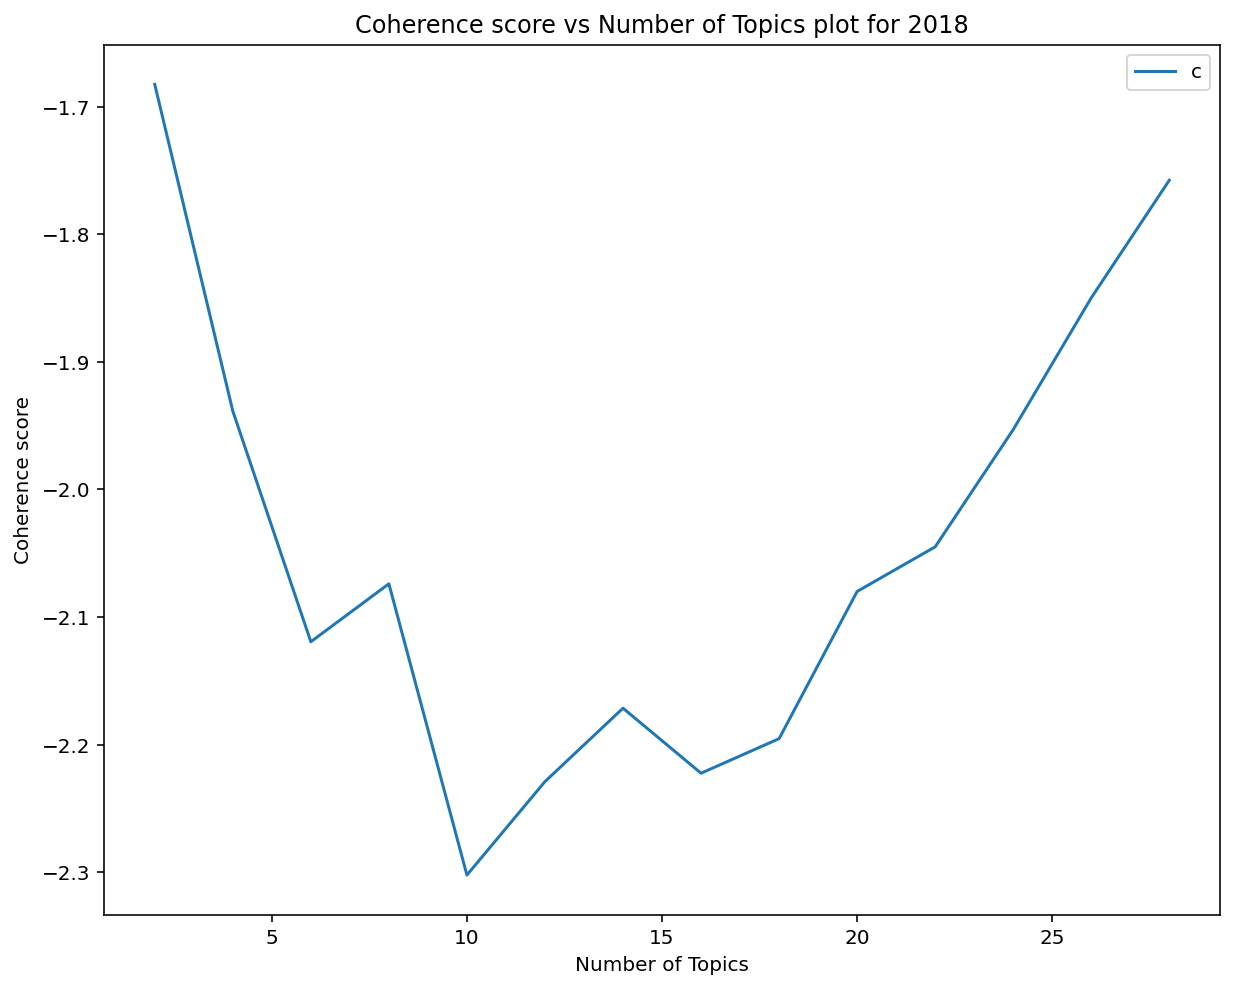

In [18]:
plt.figure(figsize = (10,8))
x = range(2, 30, 2)
values = [coherence_values[i]+ 0.005*(i**2) for i in range(len(coherence_values))]
plt.plot(x, values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence score vs Number of Topics plot for 2018')
plt.show()

In [19]:
model_2018 = gensim.models.LsiModel(corpus_tfidf, num_topics = 10, id2word = id2word)

In [20]:
pickle.dump(model_2018, open('lsa_model_2018_new.pkl', 'wb'))

In [21]:
lsa_model_2018 = pickle.load(open('lsa_model_2018_new.pkl', 'rb'))
for idx, topic in lsa_model_2018.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.239*"system" + 0.166*"computer" + 0.143*"medium" + 0.141*"layer" + 0.137*"processor" + 0.136*"signal" + 0.132*"surface" + 0.132*"program" + 0.131*"plurality" + 0.123*"information"
Topic: 1 
Words: -0.283*"layer" + 0.250*"computer" + -0.224*"surface" + 0.200*"program" + 0.192*"medium" + 0.189*"system" + 0.169*"processor" + -0.164*"material" + 0.159*"instruction" + 0.152*"nontransitory"
Topic: 2 
Words: -0.389*"acid" + -0.319*"layer" + -0.216*"composition" + -0.208*"consist" + 0.184*"member" + -0.183*"thereof" + -0.182*"agent" + -0.176*"weight" + -0.151*"cell" + -0.141*"sequence"
Topic: 3 
Words: -0.620*"layer" + 0.250*"acid" + 0.228*"signal" + -0.202*"computer" + -0.162*"program" + -0.135*"medium" + 0.134*"cell" + 0.125*"composition" + 0.121*"sequence" + -0.118*"material"
Topic: 4 
Words: 0.418*"layer" + 0.380*"signal" + -0.222*"member" + -0.201*"computer" + -0.171*"acid" + -0.169*"program" + 0.147*"voltage" + -0.142*"surface" + 0.126*"output" + -0.124*"product"
Topic

For 2019

In [22]:
outer_list_year_2019 = outer_list_pkl[df_lengths[1]-1:df_lengths[1+1]]
tfidf_2019 = models.TfidfModel(outer_list_year_2019)
corpus_tfidf_2019 = tfidf_2019[outer_list_year_2019]

In [23]:
coherence_values_2019 = []
model_list_2019 = []
for i in range(2, 30, 2):
  # generate LSA model
  model = gensim.models.LsiModel(corpus_tfidf_2019, num_topics= i, id2word = id2word)
  model_list_2019.append(model)
  coherencemodel = CoherenceModel(model = model, corpus = corpus_tfidf_2019, dictionary = id2word, coherence = 'u_mass')
  coherence_values_2019.append(coherencemodel.get_coherence())

In [24]:
pickle.dump(coherence_values_2019, open('coherence_values_lsa_2019.pkl', 'wb'))

In [25]:
coherence_values_2019 = pickle.load(open('coherence_values_lsa_2019.pkl', 'rb'))

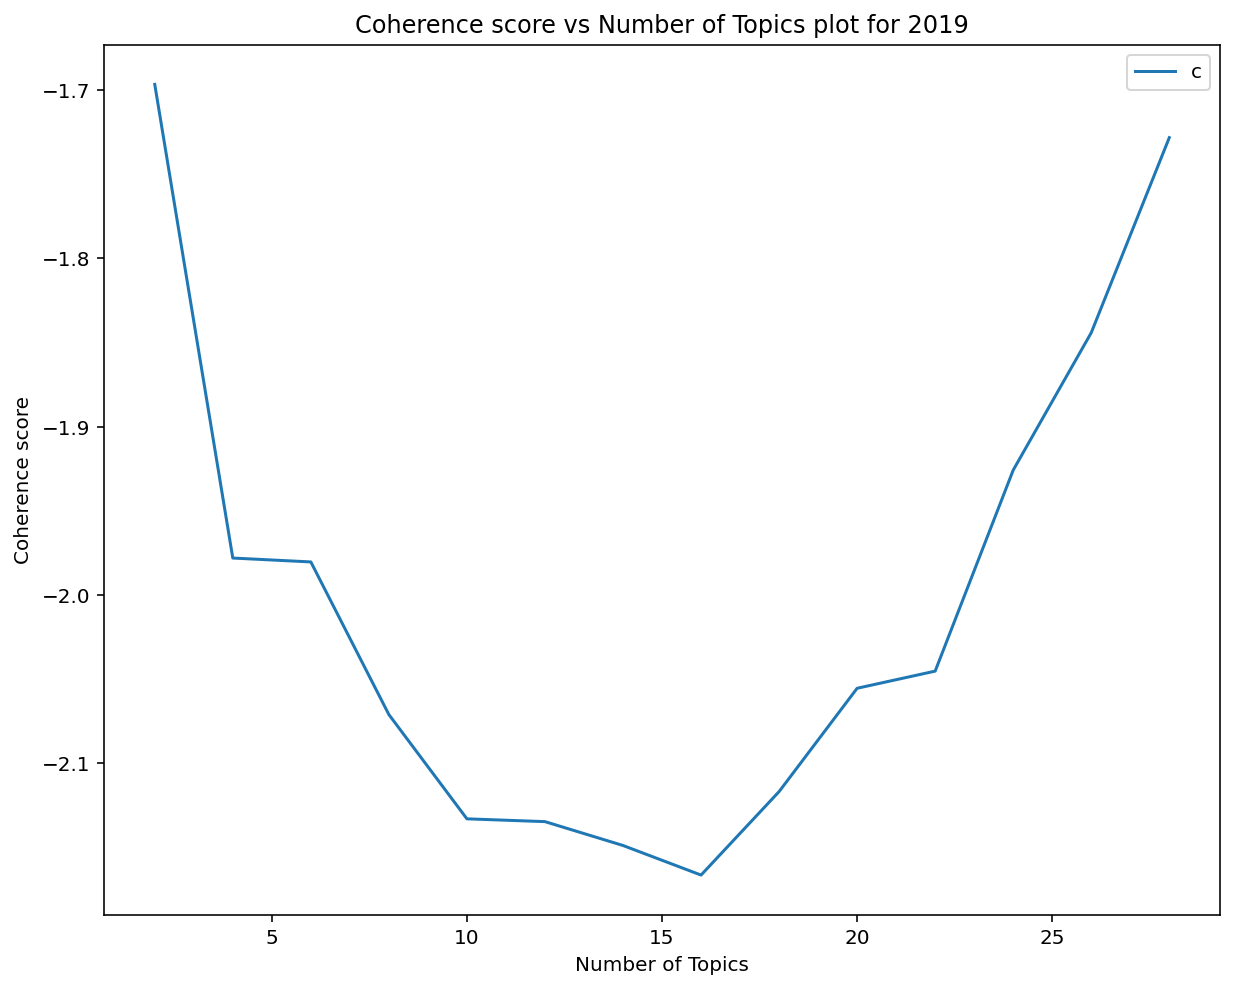

In [27]:
x = range(2, 30, 2)
values_2019= [coherence_values_2019[i]+ 0.005*(i**2) for i in range(len(coherence_values_2019))]

plt.figure(figsize = (10,8))
plt.plot(x, values_2019)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence score vs Number of Topics plot for 2019')
plt.show()

In [28]:
model_2019 = gensim.models.LsiModel(corpus_tfidf_2019, num_topics = 10, id2word = id2word)

In [29]:
pickle.dump(model_2019, open('lsa_model_2019_new.pkl', 'wb'))

In [30]:
lsa_model_2019 = pickle.load(open('lsa_model_2019_new.pkl', 'rb'))
for idx, topic in lsa_model_2019.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.247*"system" + 0.173*"computer" + 0.155*"medium" + 0.148*"processor" + 0.141*"layer" + 0.133*"program" + 0.132*"plurality" + 0.132*"signal" + 0.126*"surface" + 0.123*"information"
Topic: 1 
Words: -0.292*"layer" + 0.246*"computer" + -0.225*"surface" + 0.202*"medium" + 0.187*"program" + 0.177*"system" + 0.173*"processor" + 0.165*"nontransitory" + -0.164*"material" + 0.159*"instruction"
Topic: 2 
Words: -0.408*"acid" + -0.240*"layer" + -0.230*"composition" + -0.217*"consist" + -0.196*"thereof" + -0.192*"agent" + -0.180*"cell" + -0.180*"weight" + -0.168*"sequence" + 0.168*"member"
Topic: 3 
Words: -0.669*"layer" + 0.212*"signal" + 0.203*"acid" + -0.195*"computer" + -0.147*"medium" + -0.146*"program" + 0.127*"cell" + -0.119*"material" + -0.119*"nontransitory" + 0.115*"sequence"
Topic: 4 
Words: 0.408*"layer" + 0.373*"signal" + -0.222*"member" + -0.204*"computer" + -0.160*"program" + -0.160*"surface" + -0.145*"acid" + -0.143*"medium" + 0.142*"voltage" + 0.129*"control"
To

For 2020

In [31]:
outer_list_year_2020 = outer_list_pkl[df_lengths[2]-1:df_lengths[2+1]]
tfidf_2020 = models.TfidfModel(outer_list_year_2020)
corpus_tfidf_2020 = tfidf_2020[outer_list_year_2020]

In [32]:
coherence_values_2020 = []
model_list_2020 = []
for i in range(2, 30, 2):
  # generate LSA model
  model = gensim.models.LsiModel(corpus_tfidf_2020, num_topics= i, id2word = id2word)
  model_list_2020.append(model)
  coherencemodel = CoherenceModel(model = model, corpus = corpus_tfidf_2020, dictionary = id2word, coherence = 'u_mass')
  coherence_values_2020.append(coherencemodel.get_coherence())

In [33]:
pickle.dump(coherence_values_2020, open('coherence_values_lsa_2020.pkl', 'wb'))

In [34]:
coherence_values_2020 = pickle.load(open('coherence_values_lsa_2020.pkl', 'rb'))

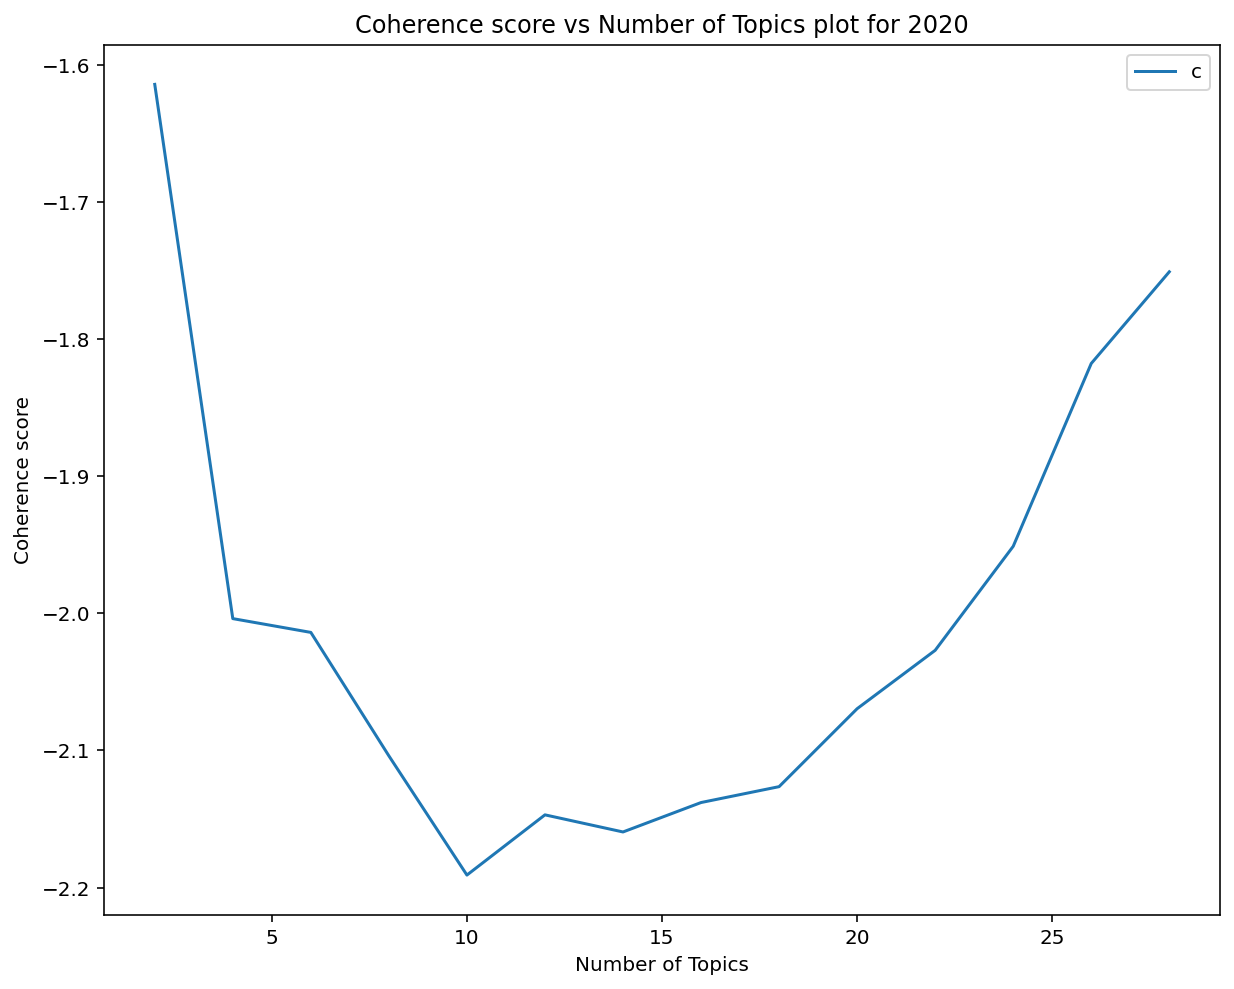

In [36]:
x = range(2, 30, 2)
values_2020 = [coherence_values_2020[i]+ 0.005*(i**2) for i in range(len(coherence_values_2020))]

plt.figure(figsize = (10,8))
plt.plot(x, values_2020)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence score vs Number of Topics plot for 2020')
plt.show()

In [37]:
model_2020 = gensim.models.LsiModel(corpus_tfidf_2020, num_topics = 10, id2word = id2word)

In [38]:
pickle.dump(model_2020, open('lsa_model_2020_new.pkl', 'wb'))

In [39]:
lsa_model_2020 = pickle.load(open('lsa_model_2020_new.pkl', 'rb'))
for idx, topic in lsa_model_2020.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.259*"system" + 0.183*"computer" + 0.163*"medium" + 0.163*"processor" + 0.140*"program" + 0.137*"layer" + 0.133*"plurality" + 0.129*"nontransitory" + 0.129*"instruction" + 0.127*"information"
Topic: 1 
Words: -0.286*"layer" + 0.238*"computer" + -0.226*"surface" + 0.197*"medium" + 0.180*"program" + 0.178*"processor" + 0.177*"system" + 0.171*"nontransitory" + -0.164*"material" + 0.155*"instruction"
Topic: 2 
Words: -0.409*"acid" + -0.244*"composition" + -0.225*"layer" + -0.214*"consist" + -0.202*"thereof" + -0.196*"cell" + -0.185*"agent" + -0.184*"weight" + -0.165*"sequence" + 0.159*"member"
Topic: 3 
Words: -0.622*"layer" + 0.228*"signal" + -0.206*"computer" + 0.178*"acid" + -0.158*"medium" + -0.154*"program" + -0.135*"nontransitory" + 0.127*"cell" + -0.126*"material" + 0.124*"control"
Topic: 4 
Words: 0.461*"layer" + 0.314*"signal" + -0.223*"member" + -0.190*"computer" + -0.161*"acid" + -0.150*"surface" + 0.148*"information" + -0.147*"program" + -0.130*"medium" + 0.12

For 2021

In [40]:
outer_list_year_2021 = outer_list_pkl[df_lengths[3]-1:df_lengths[3+1]]
tfidf_2021 = models.TfidfModel(outer_list_year_2021)
corpus_tfidf_2021 = tfidf_2021[outer_list_year_2021]

In [41]:
coherence_values_2021 = []
model_list_2021 = []
for i in range(2, 30, 2):
  # generate LSA model
  model = gensim.models.LsiModel(corpus_tfidf_2021, num_topics= i, id2word = id2word)
  model_list_2021.append(model)
  coherencemodel = CoherenceModel(model = model, corpus = corpus_tfidf_2021, dictionary = id2word, coherence = 'u_mass')
  coherence_values_2021.append(coherencemodel.get_coherence())

In [42]:
pickle.dump(coherence_values_2021, open('coherence_values_lsa_2021.pkl', 'wb'))

In [43]:
coherence_values_2021 = pickle.load(open('coherence_values_lsa_2021.pkl', 'rb'))

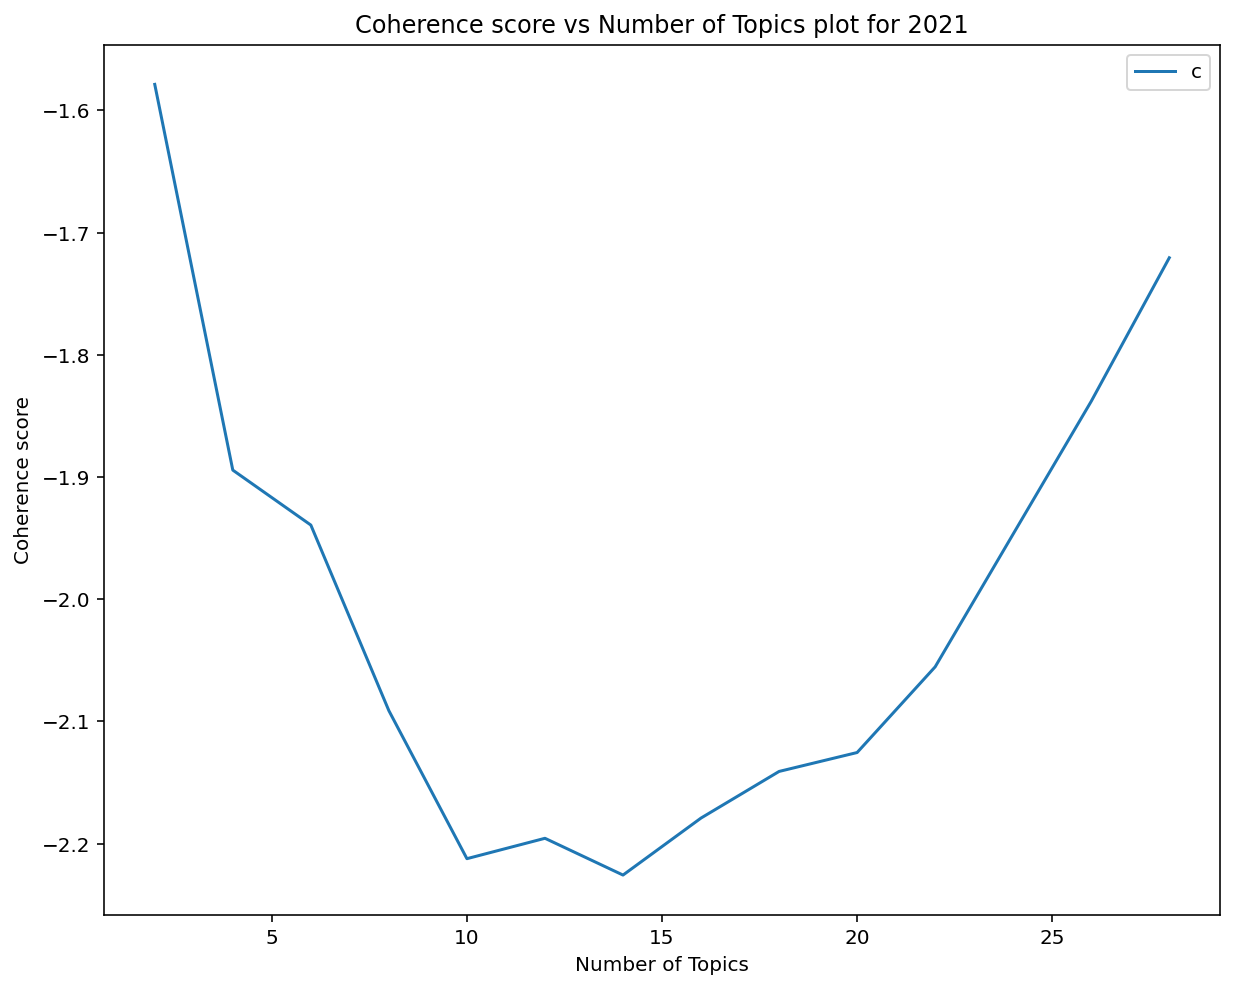

In [45]:
x = range(2, 30, 2)
values_2021 = [coherence_values_2021[i]+ 0.005*(i**2) for i in range(len(coherence_values_2021))]

plt.figure(figsize = (10,8))
plt.plot(x, values_2021)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence score vs Number of Topics plot for 2021')
plt.show()

In [46]:
model_2021 = gensim.models.LsiModel(corpus_tfidf_2021, num_topics = 10, id2word = id2word)

In [47]:
pickle.dump(model_2021, open('lsa_model_2021_new.pkl', 'wb'))

In [48]:
lsa_model_2021 = pickle.load(open('lsa_model_2021_new.pkl', 'rb'))
for idx, topic in lsa_model_2021.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.262*"system" + 0.181*"computer" + 0.174*"processor" + 0.174*"medium" + 0.141*"layer" + 0.140*"nontransitory" + 0.135*"instruction" + 0.135*"program" + 0.131*"plurality" + 0.127*"information"
Topic: 1 
Words: -0.306*"layer" + -0.223*"surface" + 0.223*"computer" + 0.205*"medium" + 0.183*"processor" + 0.179*"nontransitory" + 0.170*"system" + 0.165*"program" + -0.161*"material" + 0.156*"instruction"
Topic: 2 
Words: -0.441*"acid" + -0.261*"composition" + -0.222*"thereof" + -0.221*"cell" + -0.214*"consist" + -0.203*"sequence" + -0.197*"agent" + -0.173*"weight" + 0.138*"member" + -0.136*"combination"
Topic: 3 
Words: -0.720*"layer" + 0.182*"signal" + -0.170*"computer" + -0.154*"medium" + -0.132*"nontransitory" + -0.124*"program" + -0.122*"material" + 0.112*"control" + -0.107*"computerreadable" + 0.105*"acid"
Topic: 4 
Words: 0.370*"layer" + 0.331*"signal" + -0.203*"member" + -0.197*"computer" + -0.177*"surface" + -0.173*"medium" + 0.150*"information" + -0.143*"program" + 0

For 2022

In [49]:
outer_list_year_2022 = outer_list_pkl[df_lengths[4]-1:df_lengths[4+1]]
tfidf_2022 = models.TfidfModel(outer_list_year_2022)
corpus_tfidf_2022 = tfidf_2022[outer_list_year_2022]

In [50]:
coherence_values_2022 = []
model_list_2022 = []
for i in range(2, 30, 2):
  # generate LSA model
  model = gensim.models.LsiModel(corpus_tfidf_2022, num_topics= i, id2word = id2word)
  model_list_2022.append(model)
  coherencemodel = CoherenceModel(model = model, corpus = corpus_tfidf_2022, dictionary = id2word, coherence = 'u_mass')
  coherence_values_2022.append(coherencemodel.get_coherence())

In [51]:
pickle.dump(coherence_values_2022, open('coherence_values_lsa_2022.pkl', 'wb'))

In [52]:
coherence_values_2022 = pickle.load(open('coherence_values_lsa_2022.pkl', 'rb'))

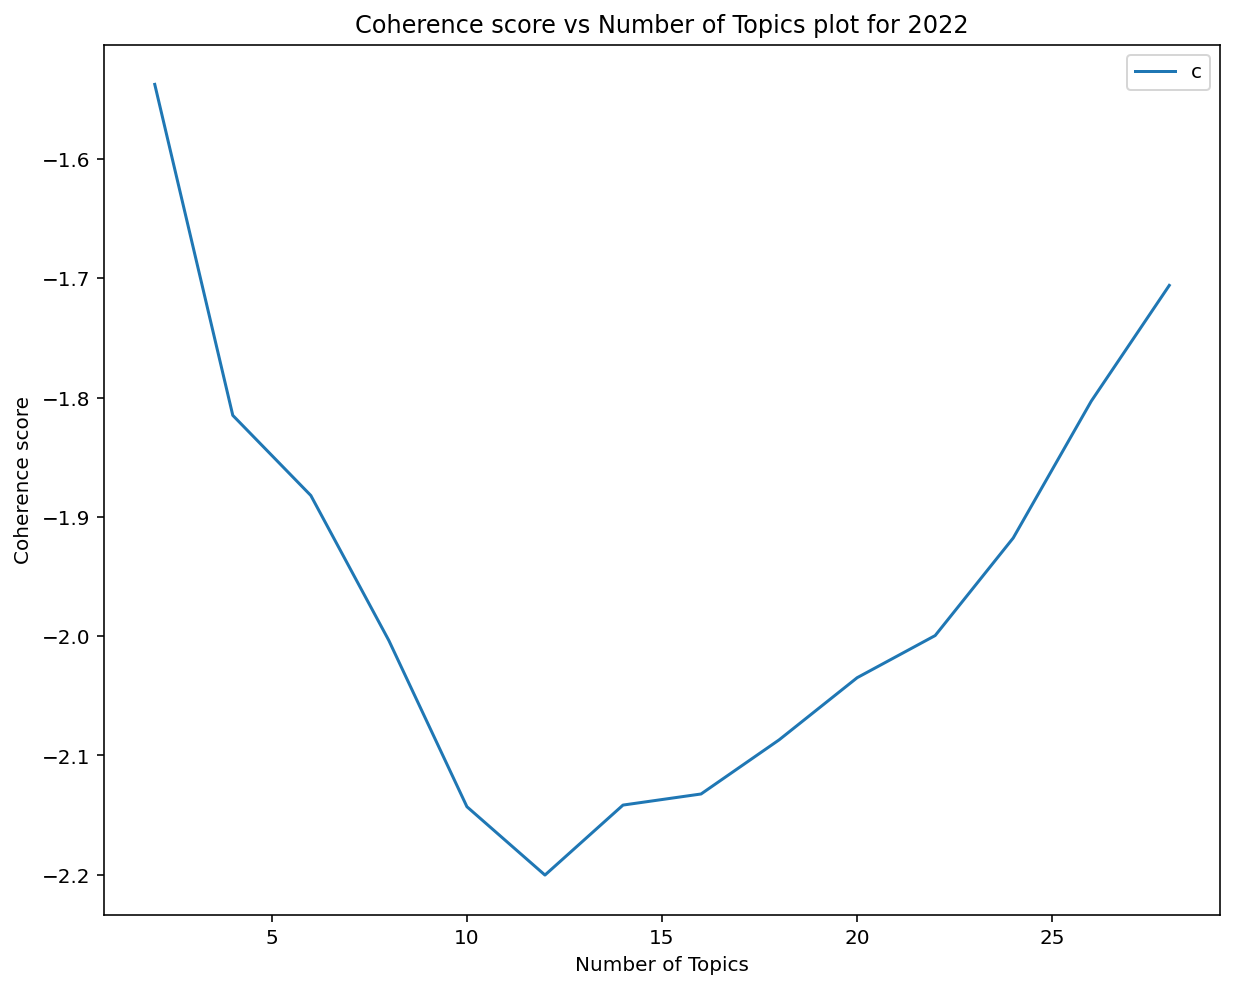

In [53]:
x = range(2, 30, 2)
values_2022 = [coherence_values_2022[i]+ 0.005*(i**2) for i in range(len(coherence_values_2022))]

plt.figure(figsize = (10,8))
plt.plot(x, values_2022)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence score vs Number of Topics plot for 2022')
plt.show()

In [54]:
model_2022 = gensim.models.LsiModel(corpus_tfidf_2022, num_topics = 12, id2word = id2word)

In [55]:
pickle.dump(model_2022, open('lsa_model_2022_new.pkl', 'wb'))

In [56]:
model_2022_10_topics = gensim.models.LsiModel(corpus_tfidf_2022, num_topics = 10, id2word = id2word)

In [57]:
pickle.dump(model_2022_10_topics, open('lsa_model_2022_new_10_topics.pkl', 'wb'))

In [58]:
lsa_model_2022 = pickle.load(open('lsa_model_2022_new_10_topics.pkl', 'rb'))
for idx, topic in lsa_model_2022.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.254*"system" + 0.185*"computer" + 0.176*"processor" + 0.171*"medium" + 0.143*"layer" + 0.139*"nontransitory" + 0.139*"program" + 0.137*"instruction" + 0.136*"plurality" + 0.126*"information"
Topic: 1 
Words: -0.316*"layer" + 0.229*"computer" + -0.220*"surface" + 0.196*"medium" + 0.186*"processor" + 0.173*"nontransitory" + 0.171*"program" + -0.158*"material" + 0.158*"system" + 0.157*"instruction"
Topic: 2 
Words: -0.461*"acid" + -0.276*"composition" + -0.235*"sequence" + -0.224*"cell" + -0.219*"consist" + -0.214*"thereof" + -0.185*"agent" + -0.164*"weight" + -0.139*"subject" + -0.135*"administer"
Topic: 3 
Words: -0.734*"layer" + 0.189*"signal" + -0.180*"computer" + -0.138*"medium" + -0.137*"program" + -0.119*"material" + -0.116*"nontransitory" + 0.110*"control" + 0.097*"sensor" + -0.096*"computerreadable"
Topic: 4 
Words: 0.371*"layer" + 0.340*"signal" + -0.228*"computer" + -0.207*"member" + -0.176*"program" + -0.172*"surface" + -0.157*"medium" + 0.144*"information" 